In [1]:
import numpy as np

# Number of pages
N = 5

# Link matrix L
L = np.array([
    [0, 1, 0, 0, 0],  # A
    [0, 0, 1, 0, 0],  # B
    [1, 0, 0, 1, 0],  # C
    [1, 1, 0, 0, 0],  # D
    [0, 1, 0, 1, 0],  # E
], dtype=float)

print("Link Matrix L:\n", L)

Link Matrix L:
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0.]]


In [2]:
P = L.copy()

for j in range(N):
    col_sum = np.sum(P[:, j])
    if col_sum == 0:                 # Dangling node
        P[:, j] = 1 / N
    else:
        P[:, j] /= col_sum

print("Column-Stochastic Matrix P:\n", P)
print("Column sums:", np.sum(P, axis=0))


Column-Stochastic Matrix P:
 [[0.         0.33333333 0.         0.         0.2       ]
 [0.         0.         1.         0.         0.2       ]
 [0.5        0.         0.         0.5        0.2       ]
 [0.5        0.33333333 0.         0.         0.2       ]
 [0.         0.33333333 0.         0.5        0.2       ]]
Column sums: [1. 1. 1. 1. 1.]


In [3]:
d = 0.7
r = np.ones(N) / N      # [0.2, 0.2, 0.2, 0.2, 0.2]
tol = 5e-6
max_iter = 1000

In [4]:
errors = []

for k in range(max_iter):
    r_new = d * P @ r + (1 - d) / N * np.ones(N)
    
    error = np.linalg.norm(r_new - r, 2)
    errors.append(error)
    
    if error < tol:
        print(f"Converged at iteration {k}")
        break
    
    r = r_new

print("Final PageRank vector:\n", r)
print("Sum of ranks:", np.sum(r))


Converged at iteration 13
Final PageRank vector:
 [0.1450503  0.23634254 0.20920417 0.19581763 0.21358537]
Sum of ranks: 1.0


In [5]:
def pagerank(P, d, tol=5e-6):
    N = P.shape[0]
    r = np.ones(N) / N
    
    for _ in range(1000):
        r_new = d * P @ r + (1 - d) / N * np.ones(N)
        if np.linalg.norm(r_new - r) < tol:
            return r_new
        r = r_new
    return r

for d in [0.4, 0.75, 0.99]:
    ranks = pagerank(P, d)
    print(f"d = {d} → PageRank = {ranks}")


d = 0.4 → PageRank = [0.16580922 0.22021061 0.20940505 0.19897127 0.20560384]
d = 0.75 → PageRank = [0.14198879 0.2388368  0.20873857 0.1952341  0.21520175]
d = 0.99 → PageRank = [0.12871213 0.24959882 0.20530449 0.19242345 0.22396111]


In [6]:
N = 6

L6 = np.array([
    [0, 1, 0, 0, 0, 1],  # A
    [0, 0, 1, 0, 0, 1],  # B
    [1, 0, 0, 1, 0, 0],  # C
    [1, 1, 0, 0, 0, 0],  # D
    [0, 1, 0, 1, 0, 1],  # E
    [0, 0, 0, 0, 0, 0],  # F (dangling)
], dtype=float)

# Normalize
P6 = L6.copy()
for j in range(N):
    if np.sum(P6[:, j]) == 0:
        P6[:, j] = 1 / N
    else:
        P6[:, j] /= np.sum(P6[:, j])

r6 = pagerank(P6, d=0.9)
print("PageRank with Page F added:\n", r6)


PageRank with Page F added:
 [0.13372162 0.23416397 0.18965919 0.17924866 0.21438262 0.04882394]


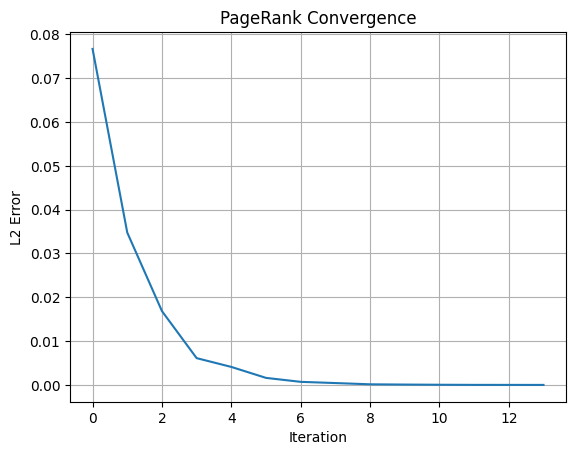

In [7]:
import matplotlib.pyplot as plt

plt.plot(errors)
plt.xlabel("Iteration")
plt.ylabel("L2 Error")
plt.title("PageRank Convergence")
plt.grid(True)
plt.show()
